In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-04-28 17:29:41.164415: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 17:29:41.228493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 17:29:41.229758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 17:29:42.166763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Prepare Data


In [2]:
df = pd.read_csv('../../../data/latest_hour_final_btc.csv')

In [3]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg,DATE
0,719,1612065600000,33930.22,34127.65,33794.27,34034.31,1805.951751,1612069199999,6.133822e+07,47859,...,693.576433,-123.229722,816.806155,119.130127,34337.592667,33157.939951,10.546399,0.974031,1.069934,2021-01-31
1,720,1612069200000,34034.30,34056.64,33678.46,33756.39,1919.906624,1612072799999,6.492941e+07,63877,...,662.246125,-135.240026,797.486151,118.863344,34362.174333,33157.859207,6.054186,0.998732,1.034352,2021-01-31
2,721,1612072800000,33757.17,33857.88,33571.42,33655.86,1945.825594,1612076399999,6.560021e+07,47790,...,627.891213,-148.395571,776.286784,118.577742,34379.210667,33157.253797,3.027093,0.961298,1.060364,2021-01-31
3,722,1612076400000,33655.85,33846.27,33450.00,33607.98,2065.004715,1612079999999,6.951583e+07,52990,...,593.316761,-160.098770,753.415531,118.316717,34396.598500,33156.420928,1.513547,0.970220,1.067847,2021-01-31
4,723,1612080000000,33607.68,33832.94,33312.12,33596.72,2711.806898,1612083599999,9.111258e+07,62435,...,560.334490,-168.945911,729.280401,118.143109,34413.577833,33155.571335,0.756773,0.977007,1.038749,2021-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,20234,1682348400000,27430.19,27431.78,27200.00,27267.05,2847.378610,1682351999999,7.772804e+07,70232,...,-474.551189,27.985206,-502.536395,119.348508,27529.856667,28835.759663,66.967173,0.935692,1.048629,2023-04-24
19426,20235,1682352000000,27267.06,27394.52,27028.64,27110.55,3676.588450,1682355599999,1.001164e+08,77477,...,-486.683663,13.871140,-500.554803,119.543406,27525.899333,28823.916077,33.483587,0.927045,1.039898,2023-04-24
19427,20236,1682355600000,27110.56,27409.46,26942.82,27381.49,4336.614960,1682359199999,1.180799e+08,85391,...,-484.325154,14.200943,-498.526097,119.860643,27525.630333,28813.585796,16.741793,0.913650,1.036474,2023-04-24
19428,20237,1682359200000,27381.48,27579.80,27290.00,27339.90,2879.101490,1682362799999,7.893014e+07,59206,...,-483.634588,13.030071,-496.664659,120.168855,27525.520333,28803.035029,19.081760,0.955280,1.023216,2023-04-24


In [4]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,ichimoku_conversion_line,macd,macd_diff,macd_signal,mi,sma,wma,stc,vi_pos,vi_neg
0,33930.22,34127.65,33794.27,34034.31,1805.951751,1612069199999,6.133822e+07,47859,901.536633,3.062264e+07,...,34227.500,693.576433,-123.229722,816.806155,119.130127,34337.592667,33157.939951,10.546399,0.974031,1.069934
1,34034.30,34056.64,33678.46,33756.39,1919.906624,1612072799999,6.492941e+07,63877,901.740718,3.049552e+07,...,34227.500,662.246125,-135.240026,797.486151,118.863344,34362.174333,33157.859207,6.054186,0.998732,1.034352
2,33757.17,33857.88,33571.42,33655.86,1945.825594,1612076399999,6.560021e+07,47790,930.326020,3.136616e+07,...,34185.710,627.891213,-148.395571,776.286784,118.577742,34379.210667,33157.253797,3.027093,0.961298,1.060364
3,33655.85,33846.27,33450.00,33607.98,2065.004715,1612079999999,6.951583e+07,52990,986.383474,3.321818e+07,...,34001.755,593.316761,-160.098770,753.415531,118.316717,34396.598500,33156.420928,1.513547,0.970220,1.067847
4,33607.68,33832.94,33312.12,33596.72,2711.806898,1612083599999,9.111258e+07,62435,1392.430165,4.679997e+07,...,33827.405,560.334490,-168.945911,729.280401,118.143109,34413.577833,33155.571335,0.756773,0.977007,1.038749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19425,27430.19,27431.78,27200.00,27267.05,2847.378610,1682351999999,7.772804e+07,70232,1311.273820,3.579657e+07,...,27438.855,-474.551189,27.985206,-502.536395,119.348508,27529.856667,28835.759663,66.967173,0.935692,1.048629
19426,27267.06,27394.52,27028.64,27110.55,3676.588450,1682355599999,1.001164e+08,77477,1883.274790,5.128798e+07,...,27374.605,-486.683663,13.871140,-500.554803,119.543406,27525.899333,28823.916077,33.483587,0.927045,1.039898
19427,27110.56,27409.46,26942.82,27381.49,4336.614960,1682359199999,1.180799e+08,85391,2041.306600,5.559569e+07,...,27331.695,-484.325154,14.200943,-498.526097,119.860643,27525.630333,28813.585796,16.741793,0.913650,1.036474
19428,27381.48,27579.80,27290.00,27339.90,2879.101490,1682362799999,7.893014e+07,59206,1370.207210,3.755738e+07,...,27331.695,-483.634588,13.030071,-496.664659,120.168855,27525.520333,28803.035029,19.081760,0.955280,1.023216


In [5]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [6]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(19430, 72)
(19430, 1)


## Prepare Model

In [7]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 11658
num_val_samples: 4857
num_test_samples: 2915


In [8]:
# Set Parameters

# delay: time in future that will be predicted
delay = 1


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 2

# sequence length: sequence lenght of each sample 
sequence_length = 4 * 24


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 1

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

The timeseries will consist of batches containing 32 sequences of 96 samples.
Finally our target is 1 timesteps in the future, and will have data from 192 timesteps in the past


In [9]:
train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

Done Train
Done Validation
Done Test


## Build and Train Model

In [48]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(1)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])


Epoch 1/100


2023-04-28 17:46:03.300547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:46:03.302209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:46:03.303563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

357/359 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0592

2023-04-28 17:46:15.900551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:46:15.902809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:46:15.904427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 18s 44ms/step - loss: 0.0071 - mae: 0.0591 - val_loss: 0.0186 - val_mae: 0.1293
Epoch 2/100
357/359 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0316

2023-04-28 17:46:32.969946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:46:32.972044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:46:32.973505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0017 - mae: 0.0316 - val_loss: 0.0098 - val_mae: 0.0932
Epoch 3/100
359/359 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0292

2023-04-28 17:46:48.449263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:46:48.451142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:46:48.452683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 44ms/step - loss: 0.0015 - mae: 0.0292 - val_loss: 0.0061 - val_mae: 0.0717
Epoch 4/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0286

2023-04-28 17:47:04.138549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:47:04.140718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:47:04.142302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 43ms/step - loss: 0.0014 - mae: 0.0286 - val_loss: 0.0043 - val_mae: 0.0577
Epoch 5/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0282

2023-04-28 17:47:19.779527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:47:19.781378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:47:19.782833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0014 - mae: 0.0282 - val_loss: 0.0031 - val_mae: 0.0479
Epoch 6/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0282

2023-04-28 17:47:35.350449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:47:35.352265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:47:35.353729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 45ms/step - loss: 0.0014 - mae: 0.0282 - val_loss: 0.0025 - val_mae: 0.0426
Epoch 7/100
357/359 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0282

2023-04-28 17:47:55.737790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:47:55.739640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:47:55.741059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0014 - mae: 0.0282 - val_loss: 0.0021 - val_mae: 0.0390
Epoch 8/100
357/359 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0281

2023-04-28 17:48:11.001938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:48:11.003953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:48:11.005449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0014 - mae: 0.0281 - val_loss: 0.0019 - val_mae: 0.0362
Epoch 9/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0280

2023-04-28 17:48:26.186128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:48:26.187989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:48:26.189442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 44ms/step - loss: 0.0014 - mae: 0.0280 - val_loss: 0.0017 - val_mae: 0.0341
Epoch 10/100
359/359 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0280

2023-04-28 17:48:42.117044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:48:42.118737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:48:42.120124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0014 - mae: 0.0280 - val_loss: 0.0016 - val_mae: 0.0326
Epoch 11/100
358/359 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0279

2023-04-28 17:48:57.459493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:48:57.461648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:48:57.463327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 43ms/step - loss: 0.0014 - mae: 0.0279 - val_loss: 0.0015 - val_mae: 0.0317
Epoch 12/100
358/359 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0279

2023-04-28 17:49:12.815488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:49:12.817553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:49:12.819068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 43ms/step - loss: 0.0013 - mae: 0.0279 - val_loss: 0.0014 - val_mae: 0.0310
Epoch 13/100
357/359 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0279

2023-04-28 17:49:28.755369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:49:28.757480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:49:28.759024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0013 - mae: 0.0278 - val_loss: 0.0014 - val_mae: 0.0305
Epoch 14/100
357/359 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0278

2023-04-28 17:49:43.838853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:49:43.840883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:49:43.842430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 42ms/step - loss: 0.0013 - mae: 0.0278 - val_loss: 0.0014 - val_mae: 0.0301
Epoch 15/100
359/359 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0277

2023-04-28 17:49:59.235351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:49:59.237425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:49:59.238905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0014 - val_mae: 0.0298
Epoch 16/100
357/359 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0278

2023-04-28 17:50:14.556787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:50:14.558985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:50:14.560596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 45ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0014 - val_mae: 0.0296
Epoch 17/100
359/359 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0276

2023-04-28 17:50:34.843775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:50:34.845803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:50:34.847253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 42ms/step - loss: 0.0013 - mae: 0.0276 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 18/100
359/359 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0275

2023-04-28 17:50:50.213303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:50:50.215481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:50:50.216934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 43ms/step - loss: 0.0013 - mae: 0.0275 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 19/100
357/359 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0274

2023-04-28 17:51:05.695515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:51:05.697460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:51:05.698939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 16s 44ms/step - loss: 0.0013 - mae: 0.0273 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 20/100
357/359 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270

2023-04-28 17:51:21.315808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:51:21.317697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:51:21.319222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 42ms/step - loss: 0.0012 - mae: 0.0270 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 21/100
358/359 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0266

2023-04-28 17:51:36.618819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:51:36.620856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:51:36.622369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

359/359 [==============================] - 15s 43ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 0.0013 - val_mae: 0.0294
Epoch 22/100
359/359 [==============================] - 12s 32ms/step - loss: 0.0012 - mae: 0.0262 - val_loss: 0.0013 - val_mae: 0.0294
Epoch 23/100
359/359 [==============================] - 11s 31ms/step - loss: 0.0012 - mae: 0.0260 - val_loss: 0.0014 - val_mae: 0.0294
Epoch 24/100
359/359 [==============================] - 11s 32ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0014 - val_mae: 0.0295
Epoch 25/100
359/359 [==============================] - 12s 32ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0014 - val_mae: 0.0296
Epoch 26/100
359/359 [==============================] - 12s 32ms/step - loss: 0.0011 - mae: 0.0254 - val_loss: 0.0015 - val_mae: 0.0299


In [49]:
# Save the trained model to a file
model.save('lstm_model_1_ahead.h5')

## Understanding the Model

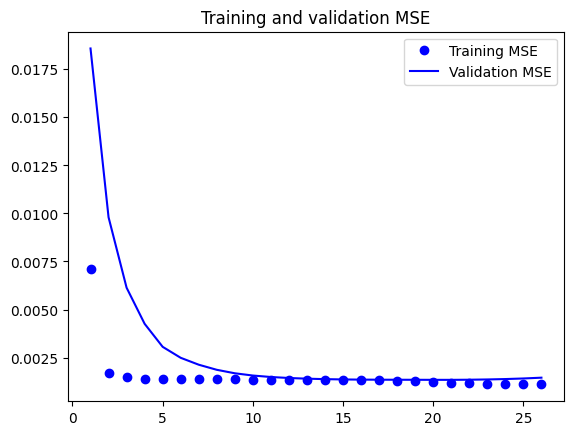

In [51]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MSE")
plt.plot(epochs, val_loss, "b", label="Validation MSE")
plt.title("Training and validation MSE")
plt.legend()
plt.show()

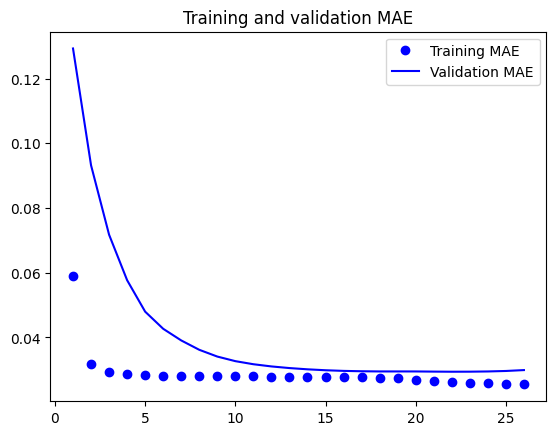

In [52]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## Looking at the data

In [53]:
pred_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=2,
                    sequence_stride=1,
                    sequence_length=96,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=32,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples
                    )




In [54]:



predictions = model.predict(pred_dataset)

2023-04-28 17:53:49.349613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-28 17:53:49.350352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [4857,72]
	 [[{{node Placeholder/_0}}]]


  7/146 [>.............................] - ETA: 1s  

2023-04-28 17:53:49.647271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 17:53:49.649009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 17:53:49.650539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

146/146 [==============================] - 2s 9ms/step


In [55]:
len(close[num_train_samples+180:num_train_samples + num_val_samples+1])

4678

In [56]:
len(predictions)

4666

In [72]:
len(close[num_train_samples:(num_train_samples + num_val_samples)-191])

4666

In [58]:
num_val_samples-len(predictions)

191

In [59]:
predictions

array([[0.27960017],
       [0.2784036 ],
       [0.27785063],
       ...,
       [0.04277898],
       [0.03899637],
       [0.03210381]], dtype=float32)

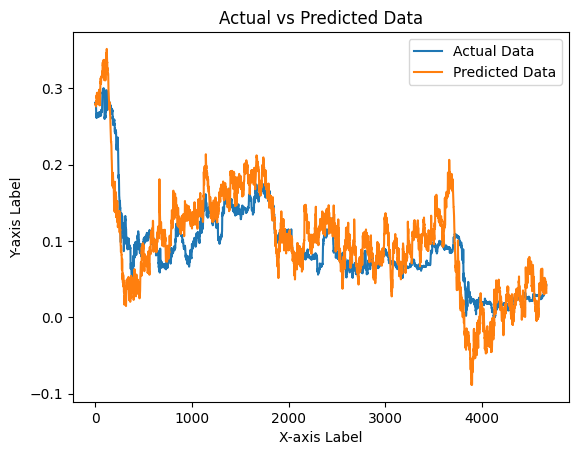

In [74]:
# Generate the predictions using your model and store it in a variable called 'predictions'

# Plot the actual data
#plt.plot(range(len(predictions)), close[num_train_samples:(num_train_samples + num_val_samples+192)], label='Actual Data')
plt.plot(range(len(predictions)), close[num_train_samples:(num_train_samples + num_val_samples)-191], label='Actual Data')



# Plot the predicted data
plt.plot(range(len(predictions)), predictions, label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

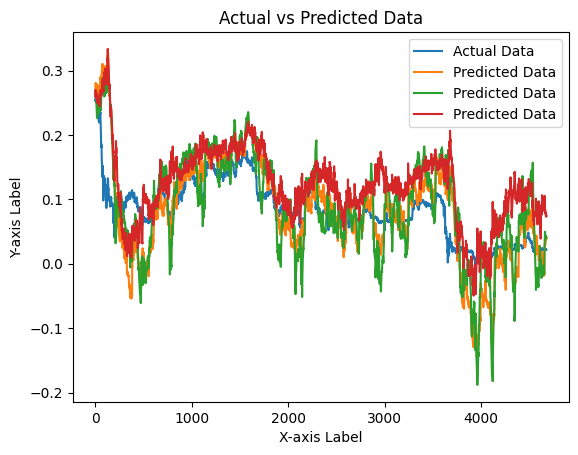

In [19]:
# Generate the predictions using your model and store it in a variable called 'predictions'


actual = close[num_train_samples+180:num_train_samples + num_val_samples+1]

# Plot the actual data
plt.plot(range(len(actual[0:24*5*60])), actual[0:24*5*60], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(actual[0:24*5*60])), predictions[0:24*5*60], label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

# BTC